## Max & min

In [1]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
parser = lambda x: pd.Timestamp(datetime.fromtimestamp(int(x)/1000))

In [37]:
df = pd.read_csv("./data/2019-1-1-BTCUSDT-5m.csv", index_col="Open time", parse_dates=['Open time','Close time'], date_parser=parser)
d1 = pd.Timestamp('2019-01-6 22:15:00')
d2 = pd.Timestamp('2019-01-7 4:15:00')
d = df[d1:d2].copy()

In [32]:
argrelextrema(df.Close.values, np.less_equal, order=n)[0]

array([ 2, 21, 36, 59])

In [38]:
n=8 # number of points to be checked before and after 

# Find local peaks
d['min'] = d.iloc[argrelextrema(d.Close.values, np.less_equal, order=n)[0]]['Close']
d['max'] = d.iloc[argrelextrema(d.Close.values, np.greater_equal, order=n)[0]]['Close']

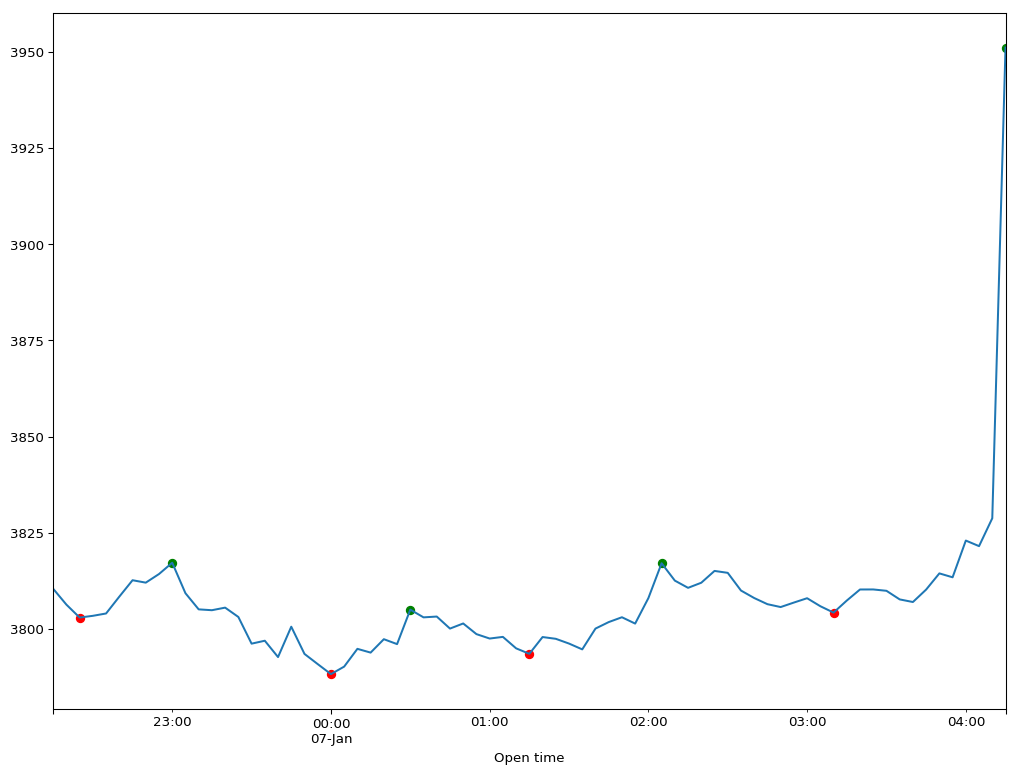

In [41]:
plt.figure(figsize=(12.8, 9.6), dpi=96);

d["Close"].plot()
plt.scatter(d.index, d['min'], c='r')
plt.scatter(d.index, d['max'], c='g')